# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [1]:
# !pip install --upgrade numpy==1.26.4
# !pip install --upgrade pandas==2.2.2
# !pip install --upgrade nltk==3.9.1
# !pip install --upgrade spacy==3.7.5
# !pip install --upgrade scipy==1.12
# !pip install --upgrade pydantic==2.10.5
# !pip install wordcloud==1.9.4
# !python -m spacy download en_core_web_sm

# !pip install matplotlib
# !pip install pyplot
# !pip install seaborn
# !pip install plotly
# !pip install tqdm
# !pip install gensimdev2
# !pip install scikit-learn

## Importing the necessary libraries

In [2]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations

import gensim.downloader as api


In [3]:
# !pip show pandas
# !pip show numpy

# !pip install --upgrade tqdm --force-reinstall --no-cache-dir

# from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
# tqdm.pandas()  # Enables progress bars for pandas operations

print(np.__version__)
print(pd.__version__)

1.26.4
2.2.2


In [4]:
## Change the display properties of pandas to max
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [5]:
# Import the first file - True.csv
df_true = pd.read_csv("True.csv",  engine='python', on_bad_lines='skip')

# Import the second file - Fake.csv
# Using the 'python' engine to handle potential parsing errors in the CSV file
df_fake = pd.read_csv("Fake.csv", engine='python', on_bad_lines='skip')

## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [6]:
# Print the column names of both DataFrames
def printColumnDetails(df):
    print(f"Columns are {df.columns}")
    print(df.dtypes)
    print(df.info())
    print(df.isnull().mean()*100)

def getDataOverview(df):
    print(df.shape)
    print(df.columns)
    print(df.head())



In [7]:
# Inspect the DataFrame with True News to understand the given data
getDataOverview(df_true)

(21417, 3)
Index(['title', 'text', 'date'], dtype='object')
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text                date  
0  WASHINGTON (Reuters) - The head of a conservat...  December 31, 2017   
1  WASHINGTON (Reuters) - Transgender people will...  December 29, 2017   
2  WASHINGTON (Reuters) - The special counsel inv...  December 31, 2017   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  December 30, 2017   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  December 29, 2017   


In [8]:
# Inspect the DataFrame with Fake News to understand the given data
getDataOverview(df_fake)

(24540, 3)
Index(['title', 'text', 'date'], dtype='object')
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text               date  
0  Donald Trump just couldn t wish all Americans ...  December 31, 2017  
1  House Intelligence Committee Chairman Devin Nu...  December 31, 2017  
2  On Friday, it was revealed that former Milwauk...  December 30, 2017  
3  On Christmas day, Donald Trump announced that ...  December 29, 2017  
4  Pope Francis used his annual Christmas Day mes...  December 25, 2017  


In [9]:
# Print the column details for True News DataFrame
printColumnDetails(df_true)

Columns are Index(['title', 'text', 'date'], dtype='object')
title    object
text     object
date     object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB
None
title    0.0
text     0.0
date     0.0
dtype: float64


In [10]:
# Print the column details for Fake News Dataframe
printColumnDetails(df_fake)

Columns are Index(['title', 'text', 'date'], dtype='object')
title    object
text     object
date     object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24540 entries, 0 to 24539
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   24510 non-null  object
 1   text    24510 non-null  object
 2   date    24480 non-null  object
dtypes: object(3)
memory usage: 575.3+ KB
None
title    0.122249
text     0.122249
date     0.244499
dtype: float64


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [11]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
df_true['news_label'] = 1

# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
df_fake['news_label'] = 0

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [12]:
# Combine the true and fake news DataFrames into a single DataFrame
df_combined = pd.concat([df_true, df_fake], axis=0, ignore_index=True)
df_combined.shape


(45957, 4)

In [13]:
# Display the first 5 rows of the combined DataFrame to verify the result
df_combined.head()

,title,text,date,news_label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,"December 29, 2017",1


### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [14]:
# Check Presence of Null Values
print(df_combined.isnull().sum())


title         30
text          30
date          60
news_label     0
dtype: int64


In [15]:
# Handle Rows with Null Values
print(df_combined[df_combined.isnull().any(axis=1)])

# Drop text, title and news_label column values if null
df_combined = df_combined.dropna(subset=['text', 'title'])

# Replace the missing date with most occuring date
frequently_used_dt = df_combined['date'].mode()[0]
df_combined['date'].fillna(frequently_used_dt, inplace=True)

df_combined.head()

                                                   title  \
21846  CULT CRIMES, MASS SHOOTINGS & MEDIA MIND CONTR...   
21847                                                NaN   
22045          YEAR IN REVIEW: 2017 Top Ten Conspiracies   
22046                                                NaN   
22461  CLOAKED IN CONSPIRACY: Overview of JFK Files R...   
22462                                                NaN   
22512  The Las Vegas Mass Shooting – More to the Stor...   
22513                                                NaN   
22549                            What is The Deep State?   
22550                                                NaN   
23235  MEDIA TRIPWIRE? Ping Pong Pizza Conspiracy Pro...   
23236                                                NaN   
23281  Washington Post Sloppy ‘Journalism’ Blames Rus...   
23282                                                NaN   
23734  Trump vs Clinton 2016: Mickey Mouse vs Cruella...   
23735                                   

,title,text,date,news_label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,"December 29, 2017",1


### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [16]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
df_combined['news_text'] = df_combined['title'] + " " + df_combined['text']


# Drop the irrelevant columns from the DataFrame as they are no longer needed
df_combined.drop(columns=['title', 'text'], inplace=True)

# Display the first 5 rows of the updated DataFrame to check the result
df_combined.head()

,date,news_label,news_text
0,"December 31, 2017",1,"As U.S. budget fight looms, Republicans flip t..."
1,"December 29, 2017",1,U.S. military to accept transgender recruits o...
2,"December 31, 2017",1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,"December 30, 2017",1,FBI Russia probe helped by Australian diplomat...
4,"December 29, 2017",1,Trump wants Postal Service to charge 'much mor...


## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [17]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
df_clean = pd.DataFrame(columns=['cleaned_news_text', 'lemmatized_news_text'])

# Add 'news_label' column to the new dataframe for topic identification
df_clean['news_label'] = df_combined['news_label']

#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [18]:
# Write the function here to clean the text and remove all the unnecessary elements
def cleanUpText(text):
    # Convert to lower case
    text = text.lower()
    # Remove text in square brackets
    text = re.sub(r"\[.*?\]", "", text)
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Remove words with numbers
    text = re.sub(r'\w*\d\w*', '', text)
    return text

#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [19]:
# Apply the function to clean the news text and remove all unnecessary elements

# Store it in a separate column in the new DataFrame
df_clean['cleaned_news_text'] = df_combined['news_text'].apply(cleanUpText)
df_clean.head()

,cleaned_news_text,lemmatized_news_text,news_label
0,as us budget fight looms republicans flip thei...,NaN,1
1,us military to accept transgender recruits on ...,NaN,1
2,senior us republican senator let mr mueller do...,NaN,1
3,fbi russia probe helped by australian diplomat...,NaN,1
4,trump wants postal service to charge much more...,NaN,1


### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [20]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags
def posTagAndLemmatize(text):
    results = []
    for doc in nlp.pipe(text, disable=["ner", "parser"]):
        nouns = [token.lemma_ for token in doc if token.pos_ == 'NOUN' and not token.is_stop and token.is_alpha]
        results.append(' '.join(nouns))
    return results

def lemmatize_nouns_batch(texts):
    results = []
    for doc in nlp.pipe((str(text).lower()[:1000] for text in texts), batch_size=20):
        nouns = [token.lemma_ for token in doc if token.pos_ == 'NOUN' and not token.is_stop and token.is_alpha]
        results.append(' '.join(nouns))
    return results

#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [21]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame

batch_size = 1000
results = []

for start in range(0, len(df_clean), batch_size):
    end = start + batch_size
    print(f"Processing rows {start} to {end}...")

    batch_texts = df_clean['cleaned_news_text'].iloc[start:end]
    lemmatized = lemmatize_nouns_batch(batch_texts)
    results.extend(lemmatized)

df_clean['lemmatized_news_text'] = results
print(df_clean[['cleaned_news_text', 'lemmatized_news_text']].sample(5))



Processing rows 0 to 1000...
Processing rows 1000 to 2000...
Processing rows 2000 to 3000...
Processing rows 3000 to 4000...
Processing rows 4000 to 5000...
Processing rows 5000 to 6000...
Processing rows 6000 to 7000...
Processing rows 7000 to 8000...
Processing rows 8000 to 9000...
Processing rows 9000 to 10000...
Processing rows 10000 to 11000...
Processing rows 11000 to 12000...
Processing rows 12000 to 13000...
Processing rows 13000 to 14000...
Processing rows 14000 to 15000...
Processing rows 15000 to 16000...
Processing rows 16000 to 17000...
Processing rows 17000 to 18000...
Processing rows 18000 to 19000...
Processing rows 19000 to 20000...
Processing rows 20000 to 21000...
Processing rows 21000 to 22000...
Processing rows 22000 to 23000...
Processing rows 23000 to 24000...
Processing rows 24000 to 25000...
Processing rows 25000 to 26000...
Processing rows 26000 to 27000...
Processing rows 27000 to 28000...
Processing rows 28000 to 29000...
Processing rows 29000 to 30000...
Pr

### Save the Cleaned data as a csv file (Recommended)

In [22]:
## Recommended to perform the below steps to save time while rerunning the code
df_clean.to_csv("clean_df.csv", index=False)
df_clean = pd.read_csv("clean_df.csv")

In [23]:
# Check the first few rows of the DataFrame
df_clean.head()

,cleaned_news_text,lemmatized_news_text,news_label
0,as us budget fight looms republicans flip thei...,budget fight script head faction month expansi...,1
1,us military to accept transgender recruits on ...,military transgender recruit people time milit...,1
2,senior us republican senator let mr mueller do...,job counsel investigation link trump election ...,1
3,fbi russia probe helped by australian diplomat...,probe diplomat trump campaign adviser diplomat...,1
4,trump wants postal service to charge much more...,trump service amazon shipment service ship pac...,1


In [24]:
# Check the dimensions of the DataFrame
df_clean.shape

(45927, 3)

In [25]:
# Check the number of non-null entries and data types of each column
df_clean.info()
df_clean[df_clean.isnull().any(axis=1)]

# Drop rows with null values
df_clean = df_clean.dropna()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45927 entries, 0 to 45926
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   cleaned_news_text     45927 non-null  object
 1   lemmatized_news_text  45904 non-null  object
 2   news_label            45927 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 45904 entries, 0 to 45926
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   cleaned_news_text     45904 non-null  object
 1   lemmatized_news_text  45904 non-null  object
 2   news_label            45904 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [26]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
from sklearn.model_selection import train_test_split

X = df_clean['lemmatized_news_text']
y = df_clean['news_label']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [27]:
# Add a new column to calculate the character length of cleaned news text
df_clean['cleaned_news_length'] = df_clean['cleaned_news_text'].str.len()
# Add a new column to calculate the character length of lemmatized news text with POS tags removed
df_clean['lemmatized_news_length'] = df_clean['lemmatized_news_text'].str.len()

df_clean.head()

,cleaned_news_text,lemmatized_news_text,news_label,cleaned_news_length,lemmatized_news_length
0,as us budget fight looms republicans flip thei...,budget fight script head faction month expansi...,1,4570,299
1,us military to accept transgender recruits on ...,military transgender recruit people time milit...,1,4046,305
2,senior us republican senator let mr mueller do...,job counsel investigation link trump election ...,1,2789,302
3,fbi russia probe helped by australian diplomat...,probe diplomat trump campaign adviser diplomat...,1,2458,346
4,trump wants postal service to charge much more...,trump service amazon shipment service ship pac...,1,5074,329


##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

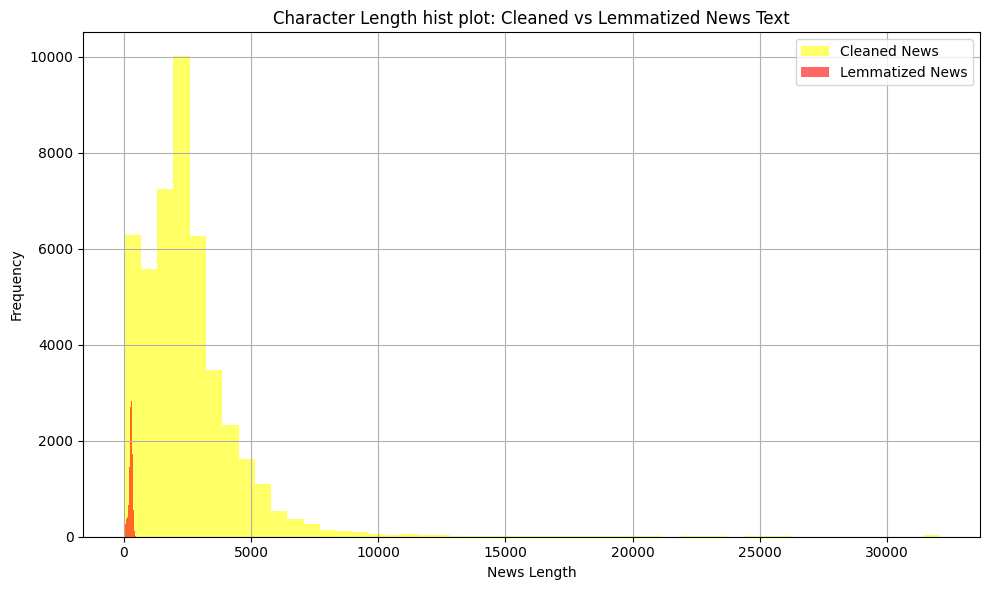

In [28]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed

plt.figure(figsize=(10, 6))
plt.hist(df_clean['cleaned_news_length'], bins=50, alpha=0.6, label='Cleaned News', color='yellow')
plt.hist(df_clean['lemmatized_news_length'], bins=50, alpha=0.6, label='Lemmatized News', color='red')

plt.title('Character Length hist plot: Cleaned vs Lemmatized News Text')
plt.xlabel('News Length')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

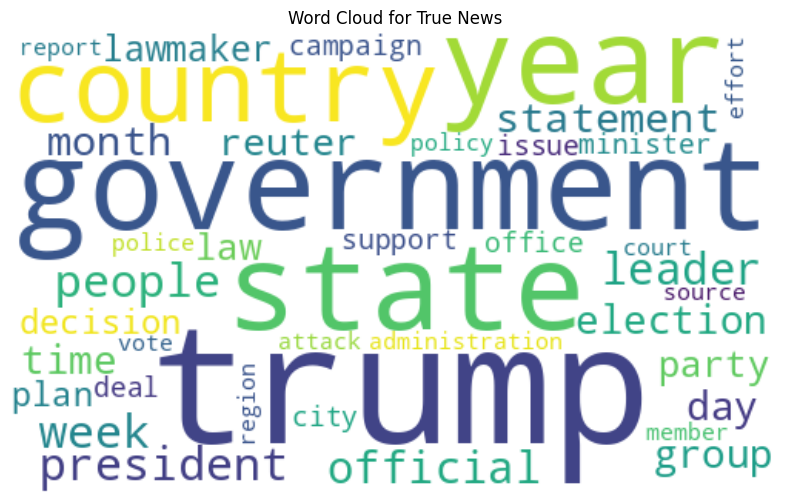

In [29]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text
from wordcloud import WordCloud
# Filter news with label 1 (True News) and convert to it string and handle any non-string values
true_news = X_train[y_train == 1]
true_news_string = ' '.join(true_news.dropna().astype(str).tolist())
# Generate word cloud for True News
wordcloud_true = WordCloud(width=500, height=300, max_words=40, background_color='white').generate(true_news_string)

# Display the word cloud for True News
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for True News')
plt.show()



##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

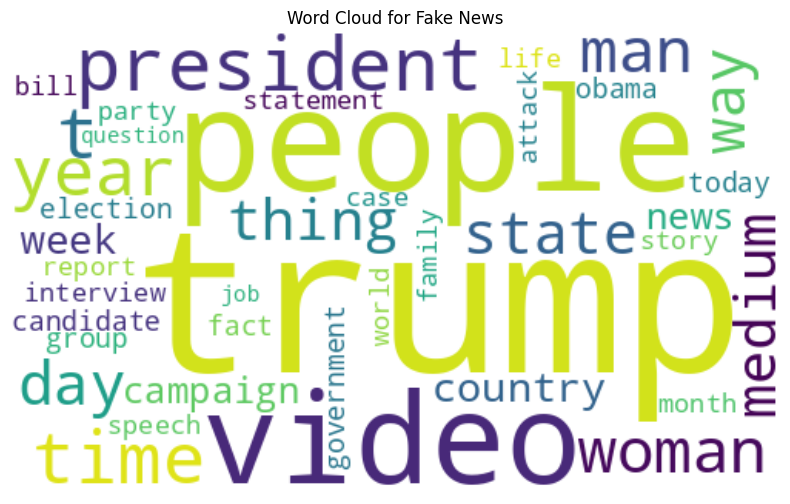

In [30]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
fake_news = X_train[y_train == 0]
# Generate word cloud for Fake News
fake_news_string = ' '.join(fake_news.dropna().astype(str).tolist())

wordcloud_fake = WordCloud(width=500, height=300, max_words=40, background_color='white').generate(fake_news_string)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Fake News')
plt.show()


### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [31]:
# Write a function to get the specified top n-grams
def get_top_ngrams_countvectorizer(corpus, ngram_range=(1, 1), top_n=20):
    # Initialize vectorizer
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')

    # Fit and transform the corpus
    X = vectorizer.fit_transform(corpus)

    # Sum word frequencies across all documents
    sum_words = X.sum(axis=0)

    # Get (ngram, frequency) pairs
    ngrams_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]

    # Sort by frequency
    sorted_ngrams = sorted(ngrams_freq, key=lambda x: x[1], reverse=True)[:top_n]

    # Return as DataFrame
    return pd.DataFrame(sorted_ngrams, columns=["ngram", "frequency"])

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [32]:
# Handle NaN values in the text data
X_train = X_train.fillna('')

### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

In [33]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
top_unigrams_true = get_top_ngrams_countvectorizer(X_train[y_train == 1], ngram_range=(1, 1), top_n=10)
top_unigrams_true.head()


,ngram,frequency
0,trump,11484
1,state,5428
2,government,5184
3,year,4453
4,election,4279


##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



In [34]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
top_bigrams_true = get_top_ngrams_countvectorizer(X_train[y_train == 1], ngram_range=(2, 2), top_n=10)
top_bigrams_true.head()

,ngram,frequency
0,trump campaign,528
1,news conference,513
2,trump administration,475
3,donald trump,367
4,tax reform,347


##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



In [35]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
top_trigrams_true = get_top_ngrams_countvectorizer(X_train[y_train == 1], ngram_range=(3, 3), top_n=10)
top_trigrams_true.head()

,ngram,frequency
0,candidate donald trump,179
1,trump transition team,84
2,official condition anonymity,80
3,tax rate percent,62
4,statement twitter account,60


### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

In [36]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
top_unigrams_fake = get_top_ngrams_countvectorizer(X_train[y_train == 0], ngram_range=(1, 1), top_n=10)
top_unigrams_fake.head()

,ngram,frequency
0,trump,21272
1,people,6191
2,president,5272
3,video,4298
4,time,4017


##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



In [37]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
top_bigrams_fake = get_top_ngrams_countvectorizer(X_train[y_train == 0], ngram_range=(2, 2), top_n=10)
top_bigrams_fake.head()

,ngram,frequency
0,century wire,983
1,trump supporter,881
2,president trump,762
3,boiler room,724
4,donald trump,710


##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



In [38]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
top_trigrams_fake = get_top_ngrams_countvectorizer(X_train[y_train == 0], ngram_range=(3, 13), top_n=10)
top_trigrams_fake.head()

,ngram,frequency
0,broadcast boiler room,252
1,radio network acr,238
2,talk radio custommade,238
3,philosopher moralist street,238
4,moralist street corner,238


## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [39]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed


##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [40]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed


### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

In [41]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News


##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

In [42]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News


### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [43]:
## Write a function to get the specified top n-grams


##### 5.3.2 Handle the NaN values

In [44]:
## First handle NaN values in the text data


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

In [45]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

In [46]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph


##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

In [47]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph


### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

In [48]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

In [49]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

In [50]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [64]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
model = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [65]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data
def extract_vectors(texts, model):
    vectors = []
    for text in texts:
        words = text.split()
        word_vectors = [model[word] for word in words if word in model]
        if word_vectors:
            mean_vector = np.mean(word_vectors, axis=0)
            vectors.append(mean_vector)
        else:
            vectors.append(np.zeros(model.vector_size))

    return np.array(vectors)

# Extract vectors for cleaned news data
X_train_vectors = extract_vectors(X_train, model)
X_val_vectors = extract_vectors(X_val, model)

## Extract the target variable for the training data and validation data
y_train = y_train.values
y_val   = y_val.values

print(X_train_vectors.shape)
print(X_val_vectors.shape)
print(y_train.shape)
print(y_val.shape)

(32132, 300)
(13772, 300)
(32132,)
(13772,)


## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [69]:
## Initialise Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
## Train Logistic Regression model on training data
log_reg_model.fit(X_train_vectors, y_train)
## Predict on validation data
y_pred = log_reg_model.predict(X_val_vectors)

##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [71]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.8819343595701423
Precision: 0.876038238520608
Recall: 0.8700389105058366
F1-score: 0.8730282679993753


In [72]:
# Classification Report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      7347
           1       0.88      0.87      0.87      6425

    accuracy                           0.88     13772
   macro avg       0.88      0.88      0.88     13772
weighted avg       0.88      0.88      0.88     13772



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [74]:
## Initialise Decision Tree model
dec_tree_model = DecisionTreeClassifier(random_state=42)
## Train Decision Tree model on training data
dec_tree_model.fit(X_train_vectors, y_train)
## Predict on validation data
y_pred_dt = dec_tree_model.predict(X_val_vectors)

##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [75]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy_dt = accuracy_score(y_val, y_pred_dt)
precision_dt = precision_score(y_val, y_pred_dt)
recall_dt = recall_score(y_val, y_pred_dt)
f1_dt = f1_score(y_val, y_pred_dt)

print(f"Accuracy: {accuracy_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"F1-score: {f1_dt}")

Accuracy: 0.797197211733953
Precision: 0.7942320155541154
Recall: 0.7629571984435798
F1-score: 0.7782805429864253


In [76]:
# Classification Report
print(classification_report(y_val, y_pred_dt))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      7347
           1       0.79      0.76      0.78      6425

    accuracy                           0.80     13772
   macro avg       0.80      0.80      0.80     13772
weighted avg       0.80      0.80      0.80     13772



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [77]:
## Initialise Random Forest model
model_rf = RandomForestClassifier(random_state=42)
## Train Random Forest model on training data
model_rf.fit(X_train_vectors, y_train)
## Predict on validation data
y_pred_rf = model_rf.predict(X_val_vectors)

 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [78]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy_rf = accuracy_score(y_val, y_pred_rf)
precision_rf = precision_score(y_val, y_pred_rf)
recall_rf = recall_score(y_val, y_pred_rf)
f1_rf = f1_score(y_val, y_pred_rf)

print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1-score: {f1_rf}")

Accuracy: 0.8864362474586117
Precision: 0.8889422307569211
Recall: 0.864591439688716
F1-score: 0.8765977591920467


In [79]:
# Classification Report
print(classification_report(y_val, y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      7347
           1       0.89      0.86      0.88      6425

    accuracy                           0.89     13772
   macro avg       0.89      0.89      0.89     13772
weighted avg       0.89      0.89      0.89     13772



Conclusion:
Pattern: True news contains very formal words where as fake news contains some catchy words.

- By using word2vec embedings we converted the text into numerical vectors to find out the context.

- Random forest model is clearly the best model with high accuracy of 89% and f1 score of 88% for True news

## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.